In [1]:
import numpy as np
import random 
np.random.seed(0)
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

In [ ]:
#TODO IMPROVE RANDOM REAL POINT DATASET GENERATION
#TODO GENERATE LOTS OF FUNCTIONS AND STORE
#TODO IMPLEMENT NN
#TODO FIND SUP SUM FJ(XJ)
#TODO MAKE MORE RESOURCES
#



In [ ]:
# ATTEMPT: USE NN TO DECIDE WHICH 

In [3]:
class FunctionFactory():
    pass



In [2]:
points = {
    0.042965843749874444: 0.6533418670832937,
    0.3787241679877035: 0.3042738424990863,
    1.1705350036933195: 0.05716522954103642,
    2.1004721426233766: 0.6455891043076963,
    2.359753961469983: 0.9360699437627219,
    2.9785776318824864: 0.654009855945541,
    3.074667346643949: 0.6284206630265659,
    3.205316525888884: 0.7456934331540251,
    3.8666608914729816: 0.6740423292719581,
    4.7658323245717025: 0.6434653583075024
}

def generate_random_real_points( number_of_points, accumulate = False, negative_numbers = False ):
    x, y = [], []
    for i in range(number_of_points):
        x_incr, y_incr = random.random(), random.random(), 
        if len(x) == 0:
            x.append(x_incr)
            y.append(y_incr)
        else:
            x.append(x_incr+x[-1])
            if accumulate:
                y.append(y_incr+y[-1])
            else:
                y.append(y_incr)
    x = np.array(x)
    y = np.array(y)
    return  dict(zip(x, y)) 


# def generate_random_nondecreasing_function( number_of_points,  ):
#     x, y = [], []
#     for i in range(number_of_points):
#         x_incr, y_incr = random.random(), random.random(), 
#         if len(x) == 0:
#             x.append(x_incr)
#             y.append(y_incr)
#         else:
#             x.append(x_incr+x[-1])
#             y.append(y_incr+y[-1])
#     x = np.array(x)
#     y = np.array(y)
#     print(x)
#     print(y)
#     def final_funcion( x, y, t ):
#         assert x[0] <= t
#         assert x[-1] >= t
        
#     return final_funcion

def generate_random_convex_function( number_of_points ):
    return integral_function(generate_random_real_points( number_of_points, accumulate = False ))

def generate_several_rcf( number_of_functions, number_of_points ):
    return np.array([generate_random_convex_function( number_of_points ) for i in range(number_of_functions)])

def piecewise_linear_function(points):
    # Sort the dictionary by x values (keys)
    sorted_points = sorted(points.items())
    def final_function( t ):
    # If t is outside the range of x values, return the corresponding endpoint y value
        if t <= sorted_points[0][0]:
            return sorted_points[0][1]
        if t >= sorted_points[-1][0]:
            return sorted_points[-1][1]
        
        # Find the two points that enclose t
        for i in range(len(sorted_points) - 1):
            x1, y1 = sorted_points[i]
            x2, y2 = sorted_points[i+1]
            
            if x1 <= t <= x2:
                # Compute the y value using the equation of the line
                return (y2 - y1) / (x2 - x1) * (t - x1) + y1
    return final_function


def integral_function(points):
    # Sort the dictionary by x values (keys)
    sorted_points = sorted(points.items())
    
    def final_function( t ):
    # If t is outside the range of x values, return the accumulated value at the endpoints
        if t <= sorted_points[0][0]:
            return 0  # Assuming starting value is 0
        if t >= sorted_points[-1][0]:
            accumulated_value = 0
            for i in range(len(sorted_points) - 1):
                accumulated_value += sorted_points[i][1] * (sorted_points[i+1][0] - sorted_points[i][0])
            return accumulated_value
        
        # Compute the accumulated value of the function at t
        accumulated_value = 0
        for i in range(len(sorted_points) - 1):
            x1, y1 = sorted_points[i]
            x2, y2 = sorted_points[i+1]
            
            if x1 <= t <= x2:
                accumulated_value += y1 * (t - x1)
                return accumulated_value
            else:
                accumulated_value += y1 * (x2 - x1)
    return final_function

def plot_function( real_function ):

    x_values = np.linspace(-10, 10, 400)
    y_values = np.array([real_function(t) for t in x_values])

    # Plot the function
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, label="f(x) = real function", color='blue')
    plt.title("Plot of real_function")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()
    plt.show()





In [3]:
functions = generate_several_rcf(10, 50)
# for f in functions:
#     plot_function(f)
print(len(functions))

10


In [17]:
# f = generate_random_convex_function( 15 )
# plot_function(f)

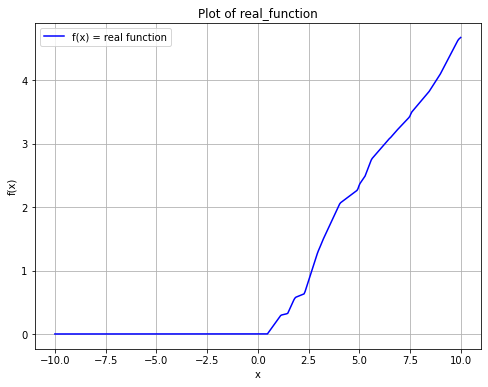

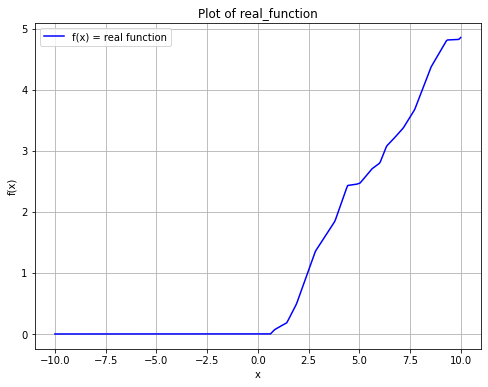

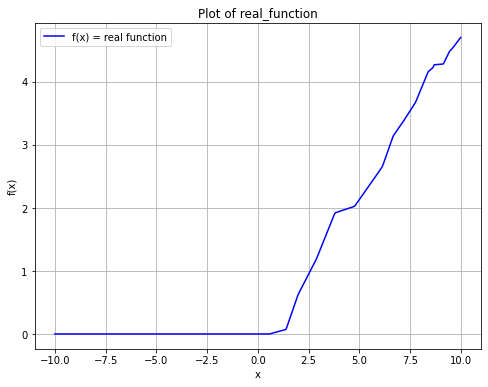

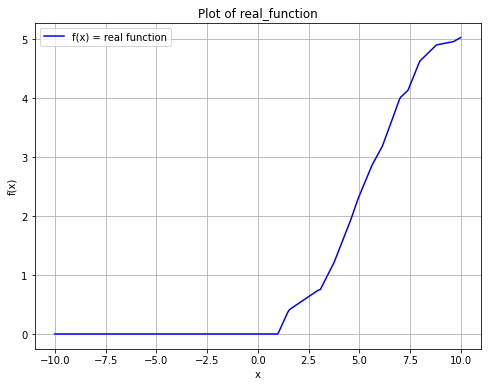

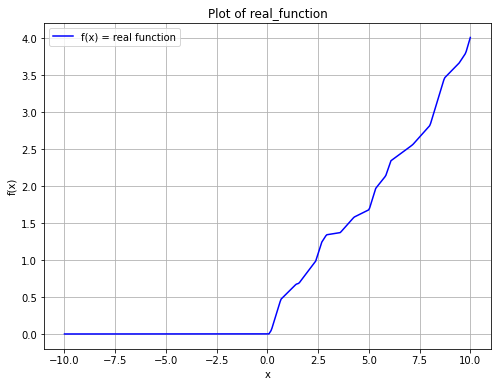

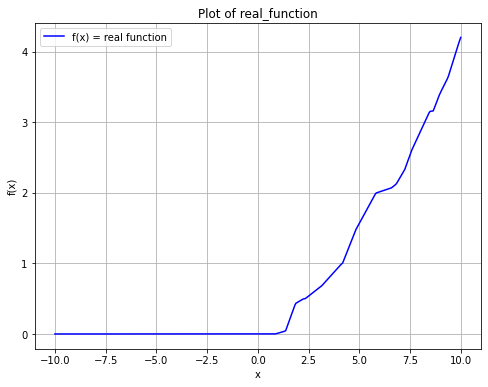

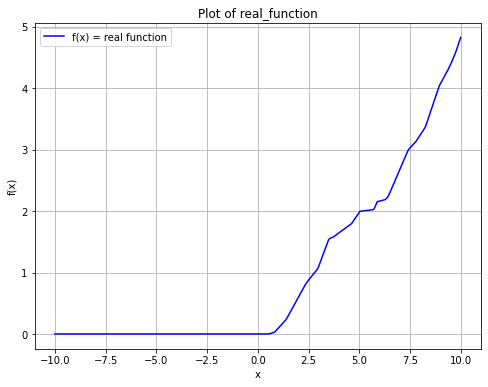

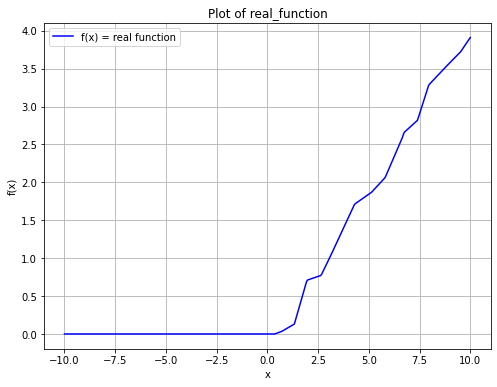

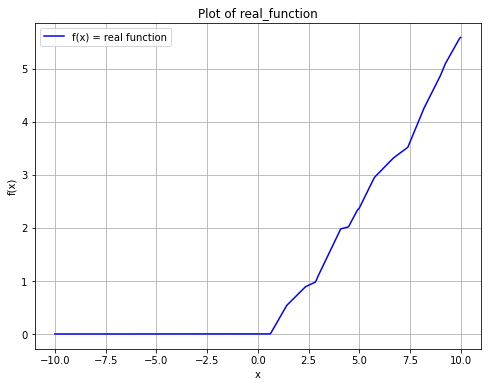

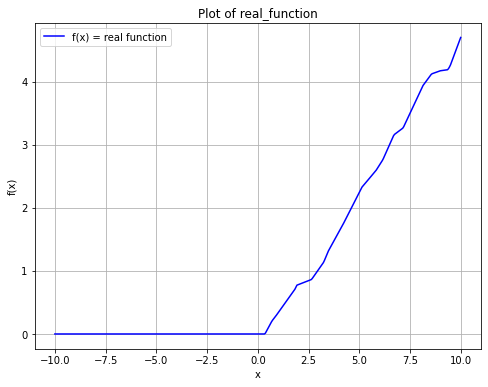

In [4]:
for function in functions:
    plot_function(function)

In [5]:
def evaluate_functions_at_points( functions, points ):
    try:
        ret = [functions[j](points[j]) for j in range(len(functions))]

        return ret
    except:
        try:
            print(functions[0])
            print(points[0][0])
            print(functions[0](points[0][0]))
            ret = [functions[j](points[0][j]) for j in range(len(functions))]
            return ret
        except:
            print(f'counldnt evaluate fuctions {functions} at points {points}')
    # return [functions[j](points[j]) for j in range(len(functions))]


In [6]:
# Define the neural network
class Net(nn.Module):
    def __init__(self, num_functions):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(num_functions, 128)
        self.fc2 = nn.Linear(128, num_functions)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))  # Use sigmoid to keep values between 0 and 1
        return x


# Loss function with penalty for constraint violation
def custom_loss(output, target, functions, N, print_bool):
    evaluation = evaluate_functions_at_points( functions, output )
    loss = 100 - sum(evaluation)
    # loss = sum([f(output[i]) for i, f in enumerate(functions)])
    # Add penalty for constraint violation
    # output.sum()
    # penalty = (output.sum() - N)**2
    if output.sum() > N:
        penalty = (output.sum() - N)**2
    else:
        penalty = (output.sum() - N)**2 - (output.sum() - N)**2
    if print_bool:
        print('evaluation', evaluation)
        print('loss', loss)
        print('penalty', penalty)
    return loss + penalty



<function integral_function.<locals>.final_function at 0x7f59cceb3370>
tensor(0.1565, grad_fn=<SelectBackward0>)
0
evaluation [0, 0, 0, 0, 0, 0, tensor(0.1073, grad_fn=<AddBackward0>), 0, 0, 0]
loss tensor(99.8927, grad_fn=<RsubBackward1>)
penalty tensor(0., grad_fn=<SubBackward0>)
<function integral_function.<locals>.final_function at 0x7f59cceb3370>
tensor(0.1629, grad_fn=<SelectBackward0>)
0
evaluation [0, 0, 0, 0, 0, 0, tensor(0.3542, grad_fn=<AddBackward0>), 0, 0, 0]
loss tensor(99.6458, grad_fn=<RsubBackward1>)
penalty tensor(0., grad_fn=<SubBackward0>)
<function integral_function.<locals>.final_function at 0x7f59cceb3370>
tensor(0.1737, grad_fn=<SelectBackward0>)
0
evaluation [0, 0, 0, 0, 0, 0, tensor(0.5997, grad_fn=<AddBackward0>), 0, 0, 0]
loss tensor(99.4003, grad_fn=<RsubBackward1>)
penalty tensor(0., grad_fn=<SubBackward0>)
<function integral_function.<locals>.final_function at 0x7f59cceb3370>
tensor(0.1888, grad_fn=<SelectBackward0>)
0
evaluation [0, 0, 0, 0, 0, 0, tensor

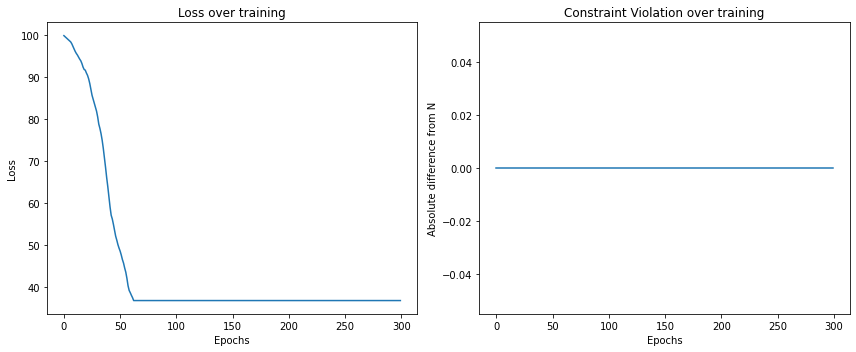

tensor([[49.2121, 44.2081,  0.0000,  0.0000,  0.0000, 39.0169, 53.0697,  0.7853,
         52.6479,  0.4752]], grad_fn=<ReluBackward0>)
tensor(239.4152, grad_fn=<AddBackward0>)


In [18]:

# Example usage
functions = generate_several_rcf( 10, 50 )
N = 2000  # For example

net = Net(len(functions))
optimizer = optim.Adam(net.parameters(), lr=0.005)

# Dummy input (can be your actual data or a tensor of ones for simplicity)
input_data = torch.ones(1, len(functions))

# Training loop
# for epoch in range(1000):  # Number of epochs
#     # print(epoch)
#     if epoch % 200 == 0:
#         print(epoch)
#         optimizer.zero_grad()
#         print('input_data', input_data)
#         output = net(input_data)
#         print('output', output)
#         loss = custom_loss(output, input_data, functions, N, print_bool=True)
#         # print(type(loss))
#         loss.backward()
#         optimizer.step()
#     else:
#         optimizer.zero_grad()
#         output = net(input_data)
#         loss = custom_loss(output, input_data, functions, N, print_bool=False)
#         # print(type(loss))
#         loss.backward()
#         optimizer.step()

# Lists to store metrics for visualization

losses = []
constraint_violations = []

    # Training loop
num_epochs = 300
for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = net(input_data)
    # loss = custom_loss(output, input_data, functions, N)
    loss = custom_loss(output, input_data, functions, N, print_bool=True)
    loss.backward()
    optimizer.step()
    
    # Log metrics
    losses.append(loss.item())
    if output.sum() > N:
        constraint_violations.append(abs(output.sum().item() - N))
    else:
        constraint_violations.append(0)

# After training, visualize the metrics
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss over training")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot constraint violation
plt.subplot(1, 2, 2)
plt.plot(constraint_violations)
plt.title("Constraint Violation over training")
plt.xlabel("Epochs")
plt.ylabel("Absolute difference from N")

plt.tight_layout()
plt.show()



# After training, output should be close to the optimal x values
result = net(input_data)
print(result)
print(sum(sum(result)))




In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Setting up a simple neural network for DQN
class DQN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DQN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )
    
    def forward(self, x):
        return self.network(x)

# Example sizes for our network
input_size = 10  # This should be the size of the state representation
hidden_size = 50  # This can be adjusted depending on the complexity of the problem
output_size = 3  # This should be the number of possible actions

# Instantiate the DQN
dqn = DQN(input_size, hidden_size, output_size)

# Use mean squared error loss function
criterion = nn.MSELoss()

# Use an Adam optimizer for training the neural network
optimizer = optim.Adam(dqn.parameters(), lr=0.001)

# Print the network architecture
# dqn

In [46]:
generate_random_real_points( 10 )


{0.3350429910261149: 0.18744843102818165,
 1.143906684962091: 0.08749346899832244,
 1.854394339284313: 0.9078524869351277,
 2.582809525768529: 0.025854351445406154,
 2.9663375503805045: 0.5993852002810116,
 3.690844747320552: 0.7937008507746676,
 4.420605627783035: 0.34188039735693787,
 5.093103549772175: 0.40383063485451565,
 5.456019381287194: 0.979907682979632,
 6.403286836436438: 0.008262381856876999}

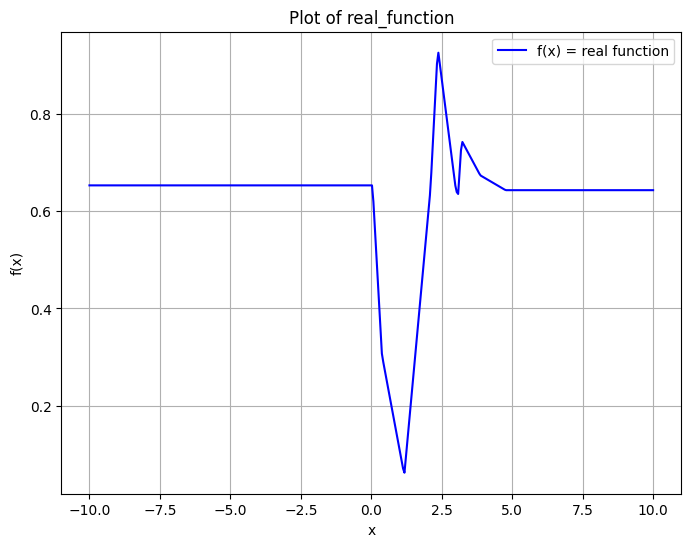

In [35]:
g = piecewise_linear_function(points)
# for i in range(-50, 100):
#     print(g(i/10))
plot_function( g )


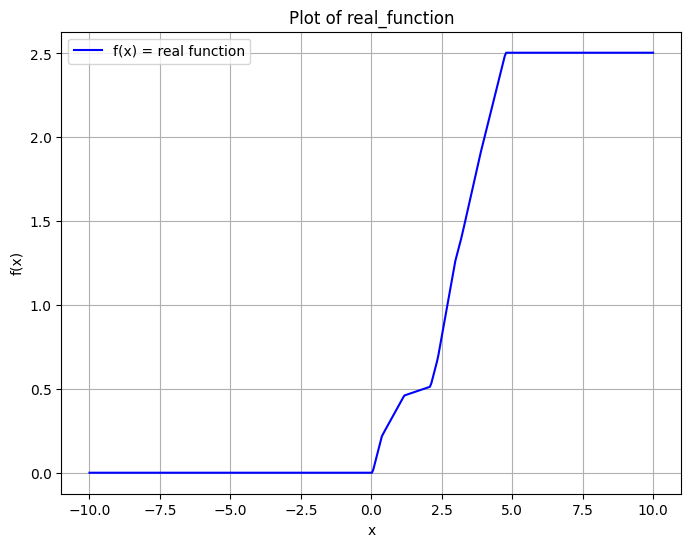

In [36]:
f = integral_function( points )
# for i in range(-5, 10):
#     print(f(i))
plot_function( f )

In [4]:
f = generate_random_nondecreasing_function( 10 )
f( -3 )


[0.2068572  1.19850759 1.49917248 1.72868122 1.93945484 2.91276355
 2.97135678 3.73334385 4.47231264 4.49690976]
[0.59988198 0.63794007 1.43301104 2.08480177 2.34742583 3.14866806
 3.66859697 4.50829217 4.7732793  5.02003516]


TypeError: generate_random_nondecreasing_function.<locals>.final_funcion() missing 2 required positional arguments: 'y' and 't'

In [5]:
for i in range(10):
    f = generate_random_convex_function()
    f( 3 )



[ 0  1  4 13 16]
[0.         0.85794562 1.70519736 2.32876105]
[ 0.          0.          2.57383685 17.92061306 24.90689622]
[ 0  5  7 13 19]
[0.         0.38344152 1.17516656 1.70406148]
[ 0.          0.          0.76688304  7.81788238 18.04225124]
[ 0  6  9 14 18]
[0.         0.0871293  0.1073477  0.93996754]
[0.         0.         0.2613879  0.79812638 4.55799656]
[ 0  1 16 16 19]
[0.         0.47360805 1.2745188  1.79499628]
[ 0.          0.          7.10412068  7.10412068 12.48910951]
[ 0  1  2  8 15]
[0.         0.14335329 1.0880222  1.60987053]
[ 0.          0.          0.14335329  6.67148651 17.9405802 ]
[ 0  3  4 12 19]
[0.         0.13521817 0.45935918 0.60903405]
[0.         0.         0.13521817 3.81009162 8.07332996]
[ 0  5  9 16 18]
[0.         0.6818203  1.0413282  1.47836015]
[ 0.          0.          2.7272812  10.01657859 12.9732989 ]
[ 0  2  4  8 10]
[0.         0.65314004 0.82404962 1.18220179]
[0.         0.         1.30628007 4.60247856 6.96688213]
[ 0  1  4 13 15